In [17]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
file_path = "https://raw.githubusercontent.com/mprateek2/Analytics-and-ML/refs/heads/main/python/Credit_card_case_study/"
file_ca = "customer_acqusition.csv"
file_sp = "spend.csv"
file_re = "repayment.csv"

In [6]:
cust = pd.read_csv(file_path + file_ca)
spend = pd.read_csv(file_path + file_sp)
repy = pd.read_csv(file_path + file_re)

In [7]:
cust.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [8]:
repy.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [9]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [10]:
# dropping the extra columns(no., sl no., unnamed:4) from the dataframes
cust.drop(columns=['No'],inplace=True)
repy.drop(columns=['SL No:','Unnamed: 4'],inplace=True)
spend.drop(columns=['Sl No:'],inplace=True)

In [11]:
# converting month column name to date and amount column to repayment_amt and spend_amt
repy.rename(columns={'Month':'repayment_date', 'Amount':'repayment_amt'},inplace=True)
spend.rename(columns={'Month':'spend_date', 'Amount':'spend_amt'},inplace=True)

In [12]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    object 
 1   Age       100 non-null    int64  
 2   City      100 non-null    object 
 3   Product   100 non-null    object 
 4   Limit     100 non-null    float64
 5   Company   100 non-null    object 
 6   Segment   100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB


In [13]:
repy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer        1500 non-null   object 
 1   repayment_date  1500 non-null   object 
 2   repayment_amt   1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 35.8+ KB


In [14]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Customer    1500 non-null   object 
 1   spend_date  1500 non-null   object 
 2   Type        1500 non-null   object 
 3   spend_amt   1500 non-null   float64
dtypes: float64(1), object(3)
memory usage: 47.0+ KB


In [18]:
# converting repayment_date and spend_date to proper datatime datatype
repy['repayment_date'] = pd.to_datetime(repy['repayment_date'])
spend['spend_date'] = pd.to_datetime(spend['spend_date'])

In [20]:
# check nulls
print(cust.isnull().sum())
print(repy.isnull().sum())
print(spend.isnull().sum())

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64
Customer          23
repayment_date    23
repayment_amt     23
dtype: int64
Customer      0
spend_date    0
Type          0
spend_amt     0
dtype: int64


In [21]:
repy.dropna(inplace=True)

In [22]:
# Check duplicates
print(cust.duplicated().sum())
print(repy.duplicated().sum())
print(spend.duplicated().sum())

0
0
0


In [24]:
# final verification of dataframes for further analysis
print(cust.info())
print(repy.info())
print(spend.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    object 
 1   Age       100 non-null    int64  
 2   City      100 non-null    object 
 3   Product   100 non-null    object 
 4   Limit     100 non-null    float64
 5   Company   100 non-null    object 
 6   Segment   100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Customer        1500 non-null   object        
 1   repayment_date  1500 non-null   datetime64[ns]
 2   repayment_amt   1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Ran

In [29]:
# customer with age less than 18, based on the requirement from the client
cust[cust['Age'] < 18].shape[0]

6

In [30]:
# customer age lower than 18 are errors, replacing them with average age (based on client requirement)
cust['Age'] = cust[['Age']].applymap(lambda x: x if x>18 else cust['Age'].mean())

In [45]:
# so we will go with two tables combination
# 1. Customer acquisition + spend
# 2. customer acquisition + repayment
cust_s = pd.merge(left=spend, right=cust, left_on='Customer', right_on='Customer', how='left')
cust_r = pd.merge(left=repy, right=cust, left_on='Customer', right_on='Customer', how='left')
print('checking cust_s dataframe shape:', cust_s.shape)
print('checking cust_r dataframe shape:', cust_r.shape)

checking cust_s dataframe shape: (1500, 10)
checking cust_r dataframe shape: (1500, 9)


In [34]:
cust_s.head(2)

,Customer,spend_date,Type,spend_amt,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,JEWELLERY,485470.80,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,2004-01-03,PETRO,410556.13,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [35]:
cust_r.head(2)

,Customer,repayment_date,repayment_amt,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,2004-01-03,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [46]:
# verifying nulls in combined dataframes
print(cust_s.isnull().sum())
print(cust_r.isnull().sum())

Customer      0
spend_date    0
Type          0
spend_amt     0
Age           0
City          0
Product       0
Limit         0
Company       0
Segment       0
dtype: int64
Customer          0
repayment_date    0
repayment_amt     0
Age               0
City              0
Product           0
Limit             0
Company           0
Segment           0
dtype: int64


In [37]:
#verifying duplicates in combined dataframes
print(cust_s.duplicated().sum())
print(cust_r.duplicated().sum())

0
0


In [47]:
# checking errors in customer spend amount and spend limit (based on client requirement)
cust_s.loc[(cust_s['spend_amt'] > cust_s['Limit']), ['spend_amt','Limit']].head()

,spend_amt,Limit
7,155562.58,100002.0
18,441442.26,10000.0
19,356733.48,10001.0
20,190011.63,10002.0
21,423672.50,100000.0


In [48]:
# above entries are errors, hence updating them based on client requirement
cust_s.loc[(cust_s['spend_amt'] > cust_s['Limit']), ['spend_amt']] = cust_s['Limit'] * 0.5

In [49]:
# checking errors in customer spend amount and spend limit (based on client requirement)
cust_r.loc[(cust_r['repayment_amt'] > cust_r['Limit']), ['repayment_amt','Limit']].head()

,repayment_amt,Limit
7,156913.59,100002.0
8,417294.81,100003.0
17,213352.06,100000.0
18,347826.27,10000.0
19,471099.22,10001.0


In [50]:
# above entries are errors, hence updating them based on client requirement
cust_r.loc[(cust_r['repayment_amt'] > cust_r['Limit']), ['repayment_amt']] = cust_r['Limit']

In [51]:
# 1.How many distinct customers exist?
cust['Customer'].unique().size

100

In [53]:
# 2. How many distinct categories exist?
cust['Segment'].unique().size

5

In [58]:
# 3. What is the average monthly spend by customers?
spend_monthwise = spend.groupby(by=[spend['spend_date'].dt.year, spend['spend_date'].dt.month]).agg({'spend_amt':np.sum})
print(f"{spend_monthwise['spend_amt'].mean():.2f}")

12154802.47


In [59]:
# 4. What is the average monthly repayment by customers?
repy_monthwise = repy.groupby(by=[repy['repayment_date'].dt.year, repy['repayment_date'].dt.month]).agg({'repayment_amt':np.sum})
print(f"{repy_monthwise['repayment_amt'].mean():.2f}")

12394502.72


In [61]:
#5. If the monthly rate of interest is 2.9%, what is the bank's profit for each month?
#   - Profit is defined as interest earned on positive Monthly Profit.
#   - Monthly Profit = Monthly Repayment - Monthly Spend.
#   - Interest is earned only on positive profits.
monthwise_sp_re = pd.concat([spend_monthwise, repy_monthwise], axis=1)
monthwise_sp_re['monthly_profit'] = monthwise_sp_re['repayment_amt'] - monthwise_sp_re['spend_amt']
monthwise_sp_re[['monthly_profit']].applymap(lambda x: x*.029 if x>0 else np.nan)

monthly_profit
2004 1              NaN
     2      21371.36063
     3      15623.27266
     4      34412.36657
     5      75647.04259
     9              NaN
     11             NaN
2005 1              NaN
     2       2423.18026
     4              NaN
     5     177956.25221
     6              NaN
     7              NaN
     8      93941.85586
     9       9601.18109
     10             NaN
     11             NaN
     12     51605.76651
2006 1              NaN
     2      12558.33661
     3              NaN
     4      85272.17188
     5     264683.10237
     6      15728.20887
     7      43311.59889
     8              NaN
     9      27002.63370
     10             NaN
     11      7662.44409
     12             NaN

In [66]:
# 6. What are the top 5 product types?
spend.groupby('Type').agg({'spend_amt':np.sum}).nlargest(1,'spend_amt',keep='all')

,spend_amt
Type,
PETRO,49863174.09


In [67]:
# 7. Which city has the highest spend?
cust_s.groupby('City').agg({'spend_amt':np.sum}).nlargest(1,'spend_amt',keep='all')

,spend_amt
City,
COCHIN,45963513.5


In [112]:
# 8. Which age group spends the most money?
def age_group(age):
    if age < 30:
        return "<30"
    elif age < 40:
        return "30-40"
    elif age < 50:
        return "40-50"
    elif age < 60:
        return "50-60"
    else:
        return "60+"
cust_s['age_group'] = cust_s['Age'].apply(age_group)
cust_s.groupby('age_group')[['spend_amt']].sum().sort_values(by='spend_amt', ascending=False).head(1)

,spend_amt
age_group,
<30,52689898.21


In [72]:
# 9. Who are the top 10 customers in terms of repayment?
cust_r.groupby('Customer').agg({'repayment_amt':np.sum}).nlargest(10,'repayment_amt',keep='all')

,repayment_amt
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


In [78]:
### Additional Analysis:
# 1. Calculate city-wise yearly spend on each product and provide a graphical representation.

In [74]:
# converting spend_date to year and month
cust_s['year'] = cust_s['spend_date'].dt.year
cust_s['month'] = cust_s['spend_date'].dt.month

In [75]:
#Calculate city-wise yearly spend on each product and provide a graphical representation.
pd.pivot_table(cust_s, values='spend_amt', index=['City','Product'],  columns =['year'], aggfunc=np.sum)

year                       2004         2005         2006
City       Product                                       
BANGALORE  Gold      9289878.54  12892362.99  12030611.09
           Platimum  1112732.30    912284.97    685831.27
           Silver    1291852.58    830612.34   1415480.94
BOMBAY     Gold      6987853.53   8983018.28   7917144.31
           Platimum   897264.94    711804.94    972130.01
           Silver     532089.03    508988.54   1092833.80
CALCUTTA   Gold      7477140.98  10303355.80  11167532.77
           Platimum  2037690.30   4434696.31   3589606.66
           Silver     500006.00    440147.06   1157956.42
CHENNAI    Gold      1059618.50   3740945.58   2704288.62
           Platimum  3535652.38   5053956.32   5024923.40
           Silver     282056.86    377184.49    350009.50
COCHIN     Gold      7315850.15  12110613.03  10499142.38
           Platimum  3419904.07   4960921.71   4920592.29
           Silver     814229.62    652269.38   1269990.87
DELHI      Gold      2806495.00   1964845.27   2957103.32
           Platimum   283512.89    494157.86    176788.72
           Silver     768172.30    612311.21    854899.97
PATNA      Gold      2072567.90   3252615.77   2276181.69
           Platimum  1113069.60   2883231.07   1256137.65
           Silver     756684.10    950094.19    700005.00
TRIVANDRUM Gold      2415102.84   1240375.85   2735710.87
           Platimum  2161676.67   3601443.30   2147403.75
           Silver     209667.48    269912.99    555862.12

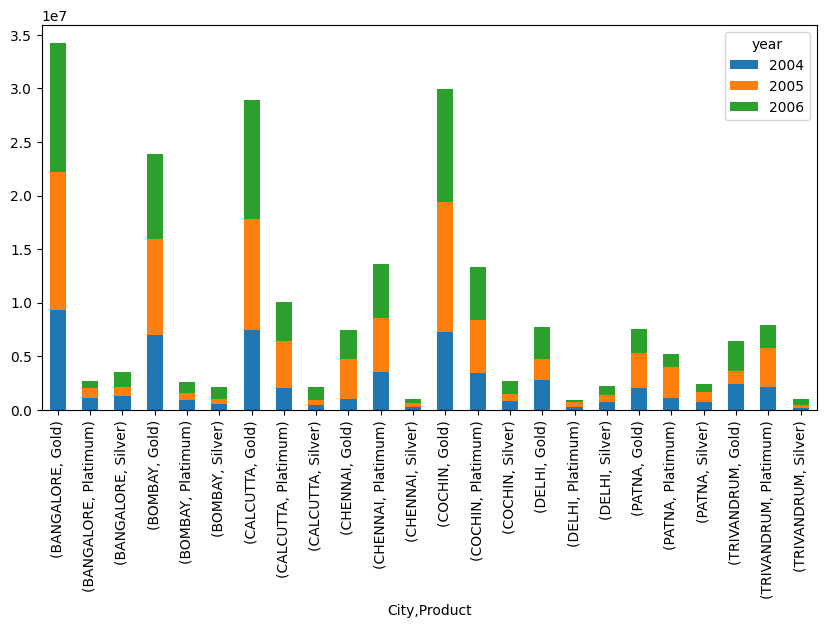

In [76]:
table1 = pd.pivot_table(cust_s, values='spend_amt', index=['City','Product'],  columns =['year'], aggfunc=np.sum)
table1.plot(kind='bar',figsize=(10,5),stacked=True)
plt.show()

In [79]:
# 2. Create visualizations for:
#   1. Monthly comparison of total spends, city-wise.
#   2. Yearly spend comparison on air tickets.
#   3. Monthly spend comparison for each product to identify seasonality.

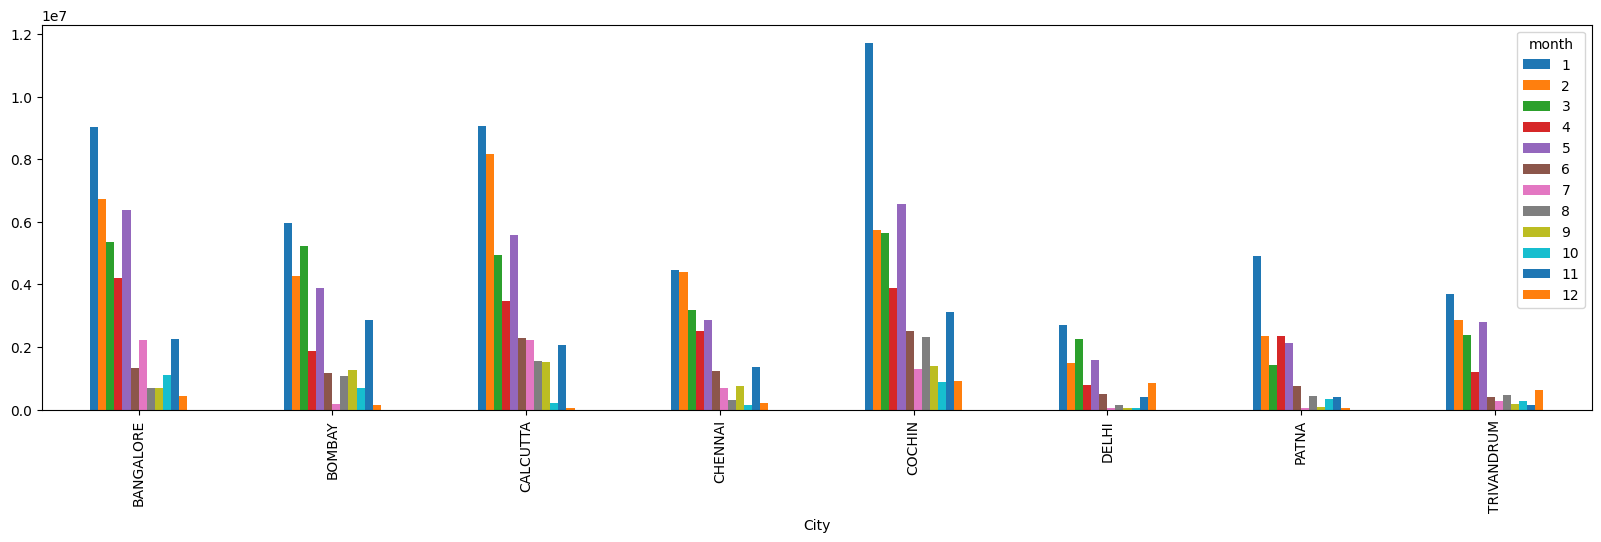

In [85]:
# 1. Monthly comparison of total spends, city-wise.
pd.pivot_table(cust_s, values='spend_amt', index=['City'],  columns =['month'], aggfunc=np.sum).plot(kind='bar',figsize=(20,5))
plt.show()

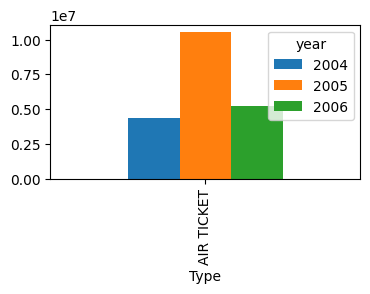

In [86]:
# 2. Yearly spend comparison on air tickets.
pd.pivot_table(cust_s, values='spend_amt', index=['Type'],  columns =['year'], aggfunc=np.sum).head(1).plot(kind='bar',figsize=(4,2))
plt.show()

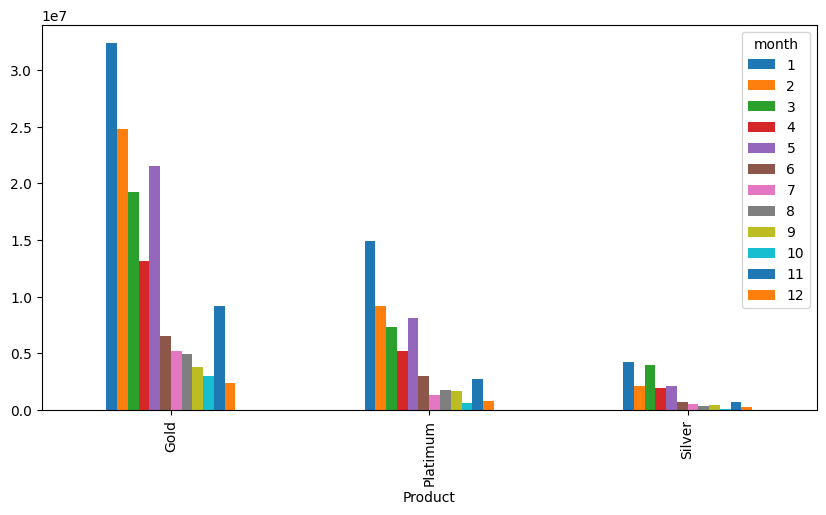

In [83]:
# 3. Monthly spend comparison for each product to identify seasonality.
pd.pivot_table(cust_s, values='spend_amt', index=['Product'],  columns =['month'], aggfunc=np.sum).plot(kind='bar',figsize=(10,5))
plt.show()

In [87]:
### User-Defined Python Function:
# Develop a Python function that:
#- Identifies the top 10 customers for each city in terms of repayment amount.
#- Allows the user to specify the product type (Gold/Silver/Platinum).
#- Allows the user to specify the time period (yearly or monthly).
#- Automatically adjusts based on user inputs to generate results.

In [93]:
# converting repayment_date to year and month
cust_r['yearly'] = cust_r['repayment_date'].dt.year
cust_r['monthly'] = cust_r['repayment_date'].dt.month

In [104]:
cust_r.head()

,Customer,repayment_date,repayment_amt,Age,City,Product,Limit,Company,Segment,yearly,monthly
0,A1,2004-01-12,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,1
1,A1,2004-01-03,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,1
2,A1,2004-01-15,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,1
3,A1,2004-01-25,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,1
4,A1,2005-01-17,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005,1


In [107]:
def top10Cust(product_type, time_period):
  filtered = cust_r.loc[(cust_r.Product == product_type)]
  grouped = filtered.groupby(['Customer','City','Product',time_period])['repayment_amt'].sum()
  top10 = grouped.nlargest(10, keep='all').reset_index()
  return top10

In [105]:
product_type= str(input("Enter Product Type from Gold/Silver/Platinum: "))
time_period= str(input("Enter Time Period from yearly/monthly: "))

Enter Product Type from Gold/Silver/Platinum: Gold
Enter Time Period from yearly/monthly: yearly


In [108]:
top10Cust(product_type, time_period)

,Customer,City,Product,yearly,repayment_amt
0,A61,COCHIN,Gold,2005,4276860.55
1,A44,DELHI,Gold,2005,4165317.77
2,A45,COCHIN,Gold,2005,4042447.57
3,A43,BANGALORE,Gold,2005,4006956.60
4,A13,BANGALORE,Gold,2005,3757673.00
5,A61,COCHIN,Gold,2006,3744127.41
6,A60,CALCUTTA,Gold,2005,3742856.10
7,A13,BANGALORE,Gold,2006,3477314.89
8,A29,CALCUTTA,Gold,2006,3434298.00
9,A28,TRIVANDRUM,Gold,2006,3376614.65
